In [1]:
"""
import essential libraries for preprocessing io 
"""
import mne 
import preprocessing
from mne_bids import BIDSPath, write_raw_bids
import argparse, sys, os 

Reading EGI MFF Header from NDA1.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {90  } ...
Reading 0 ... 2891584  =      0.000 ...  5783.168 secs...
Overwriting existing file.
Writing /home/ubuntu/baseEEG/base_eeg/raw.fif
/home/ubuntu/baseEEG/base_eeg/preprocessing.py:16: RuntimeWarning: Acquisition skips detected but did not fit evenly into output buffer_size, will be written as zeroes.
  raw.save("raw.fif", overwrite=True)
Closing /home/ubuntu/baseEEG/base_eeg/raw.fif
[done]
Opening raw data file raw.fif...
Isotrak not found
    Range : 0 ... 2891584 =      0.000 ...  5783.168 secs
Ready.


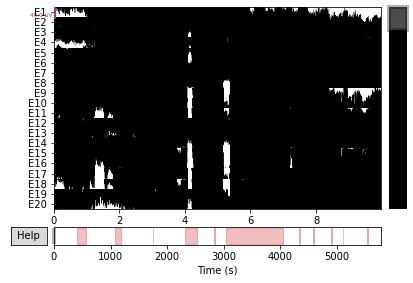

array([[-0.00553551, -0.00552137, -0.00556095, ..., -0.0041206 ,
        -0.00413942, -0.00415273],
       [-0.005775  , -0.0057555 , -0.00579825, ..., -0.00729595,
        -0.00730768, -0.00731786],
       [-0.00825448, -0.00822797, -0.00827987, ..., -0.00952551,
        -0.00953418, -0.00956381],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [2]:
""" 
Acquire a filename to be read EGI data from, and then plot the raw EGI data
Make sure you have the file available to be read from.  
"""
fname = "NDA1.mff"
raw = preprocessing.read_raw(fname)
raw.plot()
print('\n\n')
raw.get_data()



In [3]:
""" 
construct a proper bids_path where BIDS filename prefixes have one or more pieces of metadata in them. This will generate the prefix for a BIDS filename that can be used with many subsequent files, or you may also give a suffix that will then complete the file name.
"""
bids_path = BIDSPath(
    subject="01", 
    session="01",
    task="testing",
    run="01", 
    root="~/"
)

In [4]:
"""
Save raw data to a BIDS-compliant folder structure 
"""

# PowerLineFrequency parameter is required in the sidecar files.
raw.info['line_freq'] = 60
bids = preprocessing.write_bids(raw, bids_path)

Opening raw data file raw.fif...
Isotrak not found
    Range : 0 ... 2891584 =      0.000 ...  5783.168 secs
Ready.

Writing '~/README'...

References
----------
Appelhoff, S., Sanderson, M., Brooks, T., Vliet, M., Quentin, R., Holdgraf, C., Chaumon, M., Mikulan, E., Tavabi, K., Höchenberger, R., Welke, D., Brunner, C., Rockhill, A., Larson, E., Gramfort, A. and Jas, M. (2019). MNE-BIDS: Organizing electrophysiological data into the BIDS format and facilitating their analysis. Journal of Open Source Software 4: (1896). https://doi.org/10.21105/joss.01896

Pernet, C. R., Appelhoff, S., Gorgolewski, K. J., Flandin, G., Phillips, C., Delorme, A., Oostenveld, R. (2019). EEG-BIDS, an extension to the brain imaging data structure for electroencephalography. Scientific Data, 6, 103. https://doi.org/10.1038/s41597-019-0104-8


Writing '~/participants.tsv'...

participant_id	age	sex	hand
sub-01	n/a	n/a	n/a

Writing '~/participants.json'...

{
    "participant_id": {
        "Description": "Uniq

ImportError: pybv >=0.4 is required for converting file to BrainVision format